In [6]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [7]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    std_y = y_noise - data
    return np.array(y_noise), std_y


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise, sub_y = normal(y, mu, var)
    return x, y, y_noise, sub_y

In [8]:
nodes = 50
mu = 0
var = 0.02


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [9]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X


def full_bayesian_mine(m, alpha, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    # Y = Y.reshape(1, -1)
    ss = np.linalg.inv((X.T @ X / var + alpha * np.identity(m)))
    w_ = ss @ X.T @ Y * (1 / var)
    return w_, X, ss


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [10]:
m = 10
alpha = 0.5
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.009549453088487325


In [11]:
def display(m, alpha, beta, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha},bate={beta}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


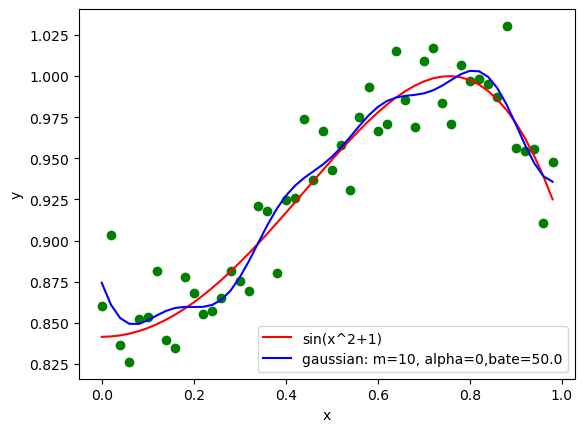

w:  [ 1.19759425 -0.85930899  1.55410171 -2.60892079  3.02283959 -3.35769226
  3.04033343 -2.61080713  1.67345898 -0.83417891]


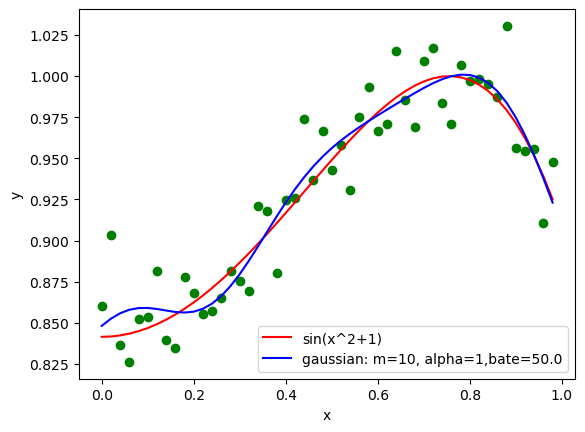

w:  [ 0.7856673   0.10686664 -0.07053769  0.03668015  0.06870563  0.03134765
  0.06308685  0.05930749  0.04162316  0.12760678]


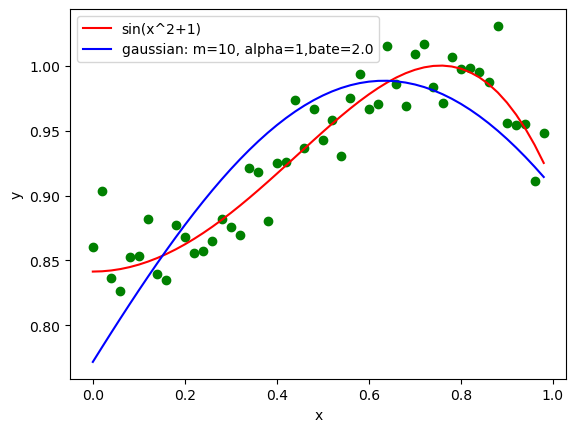

w:  [0.26086079 0.04660923 0.04314878 0.04554512 0.05439071 0.06954415
 0.09011179 0.11453509 0.14077171 0.16654248]


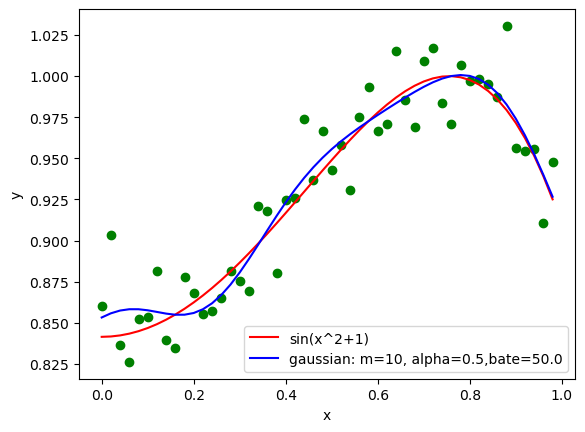

w:  [ 0.80853084  0.08485991 -0.07161135  0.0370319   0.05462643  0.02705668
  0.0585763   0.04647185  0.0497007   0.10301674]


In [12]:
params = [(0.02, 0), (0.02, 1), (0.5, 1), (0.02, 0.5)]

for var_el, al in params:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)



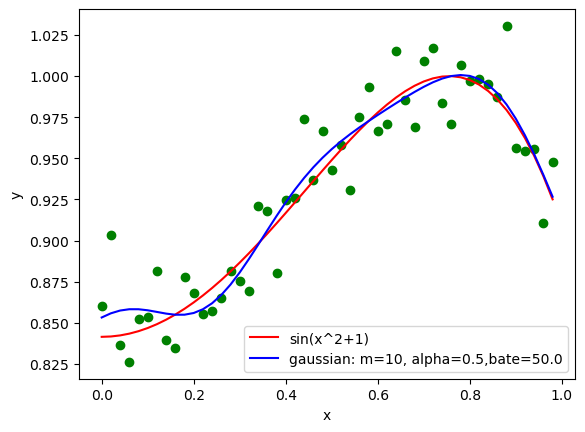

w:  [ 0.80853084  0.08485991 -0.07161135  0.0370319   0.05462643  0.02705668
  0.0585763   0.04647185  0.0497007   0.10301674]


In [13]:
param = [(0.02, 0.5)]
for var_el, al in param:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)

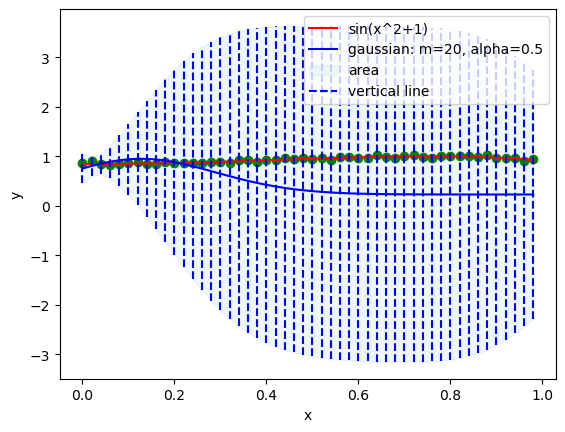

[2]
1


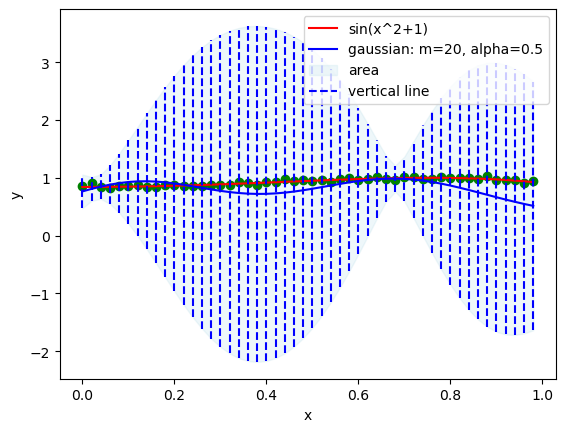

[2, 34]
2


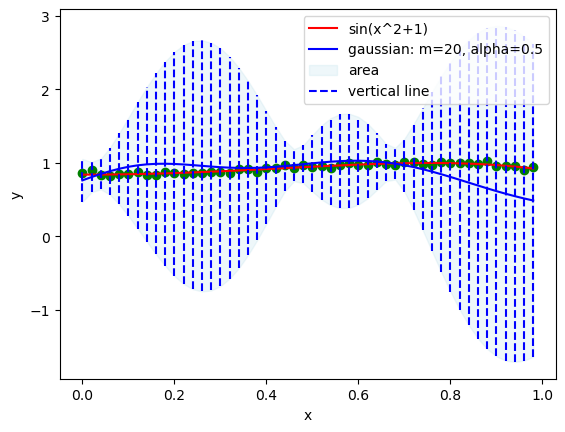

[2, 34, 23]
3


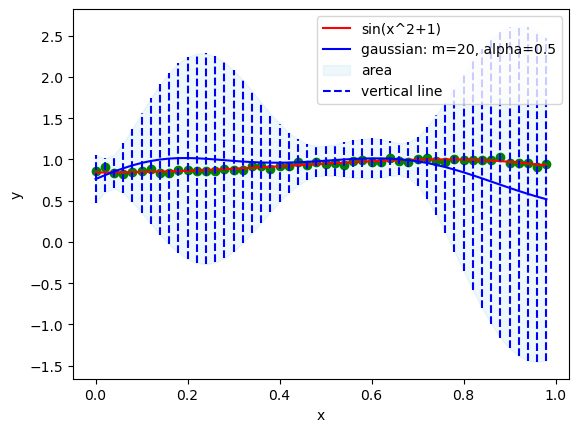

[2, 34, 23, 26]
4


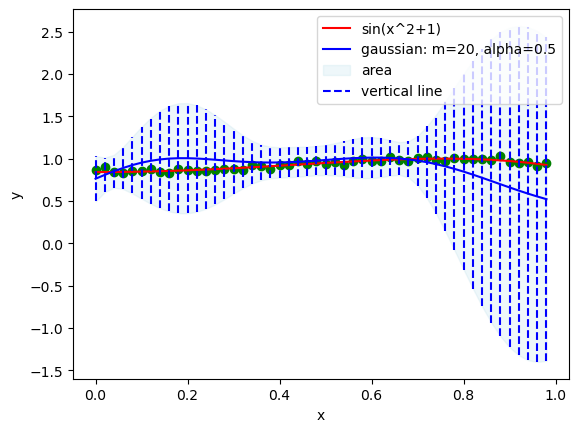

[2, 34, 23, 26, 18]
5


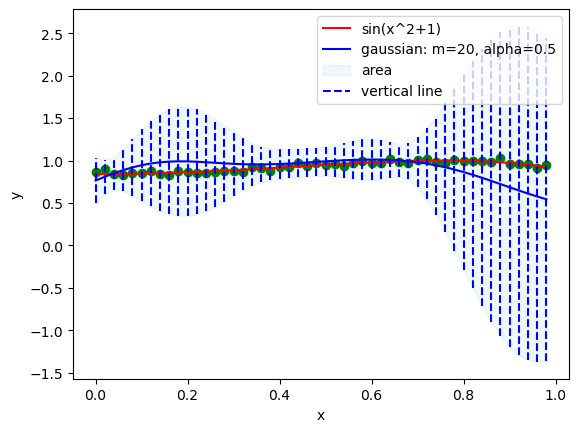

[2, 34, 23, 26, 18, 24]
6


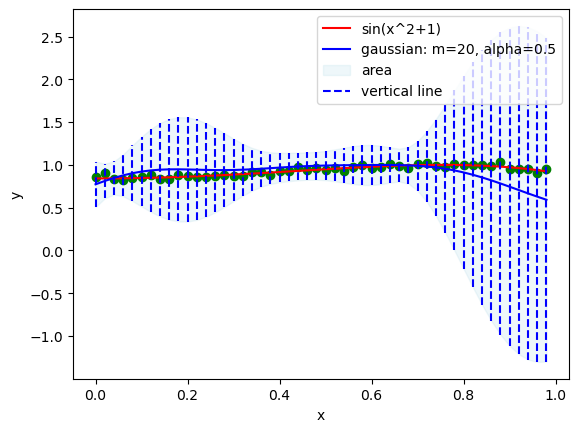

[2, 34, 23, 26, 18, 24, 22]
7


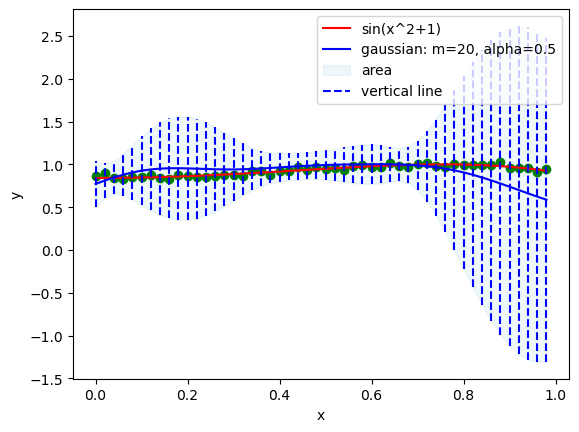

[2, 34, 23, 26, 18, 24, 22, 20]
8


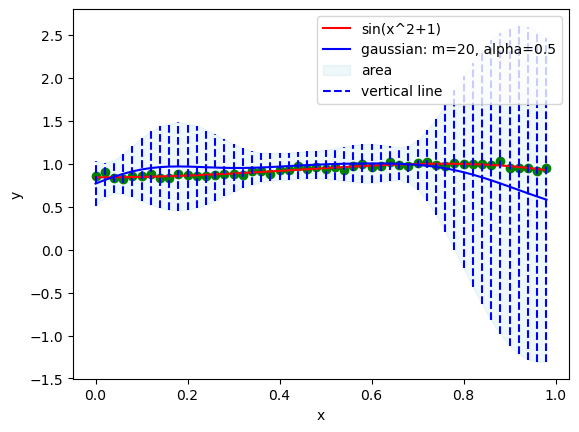

[2, 34, 23, 26, 18, 24, 22, 20, 17]
9


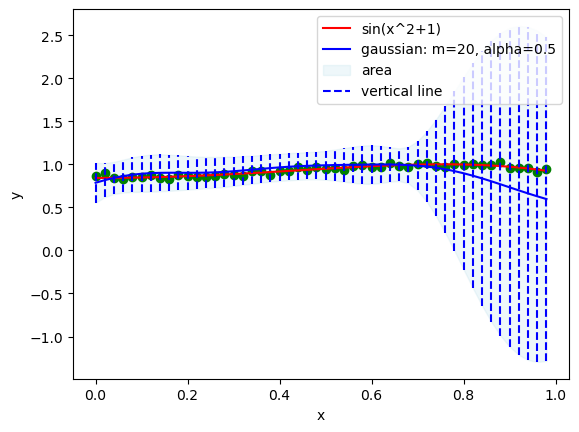

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10]
10


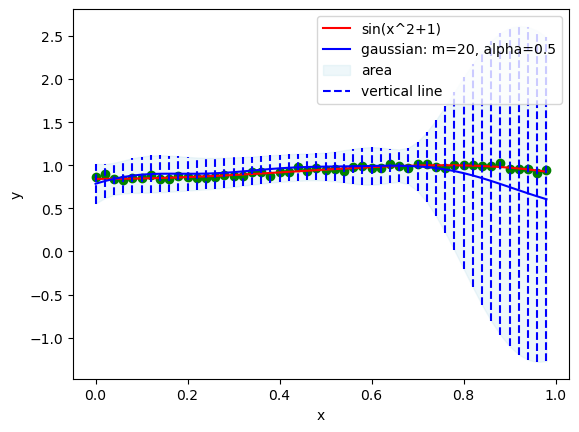

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25]
11


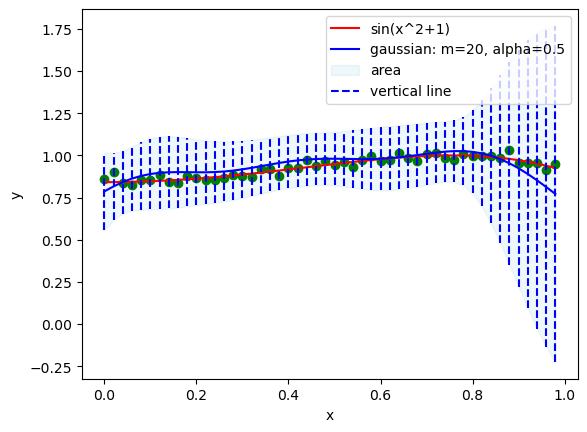

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39]
12


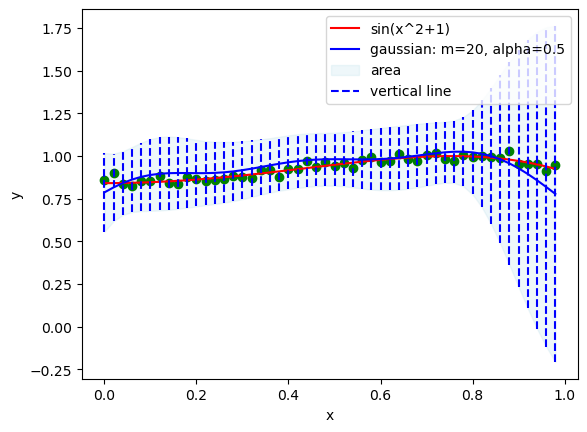

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26]
13


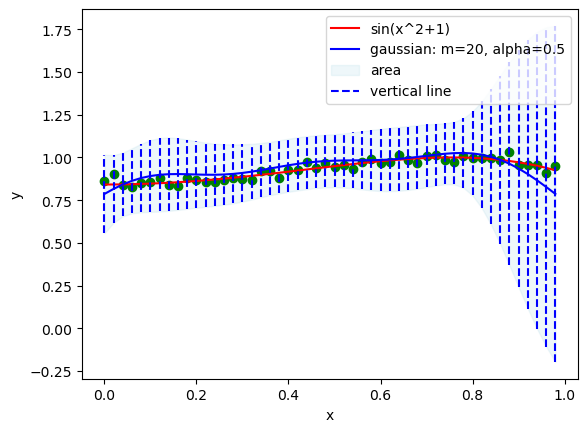

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19]
14


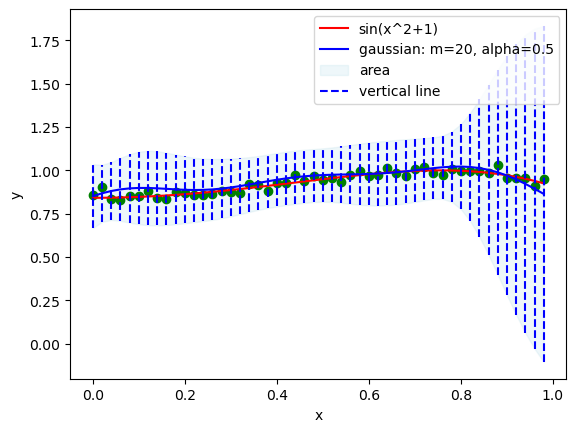

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1]
15


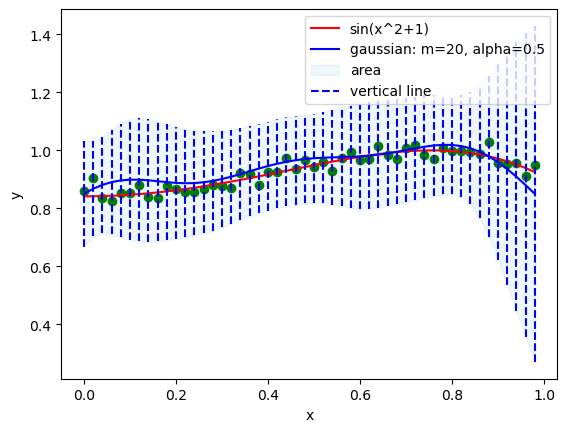

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42]
16


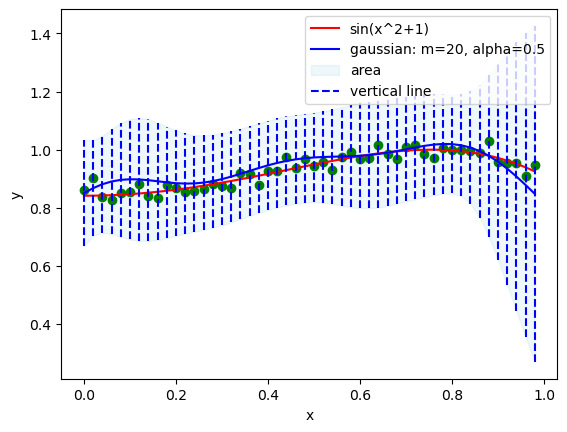

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12]
17


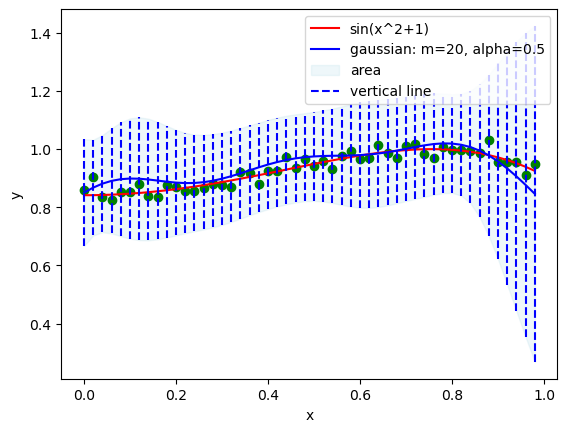

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24]
18


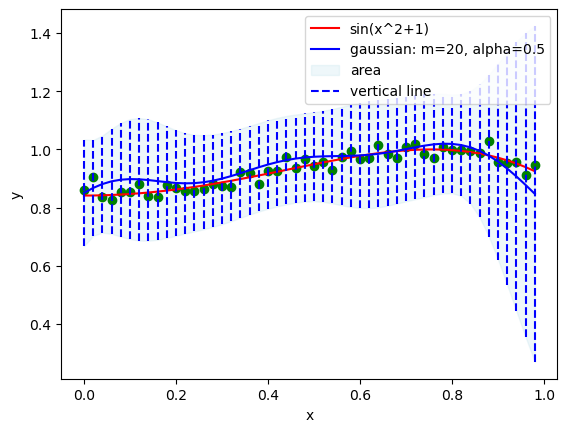

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18]
19


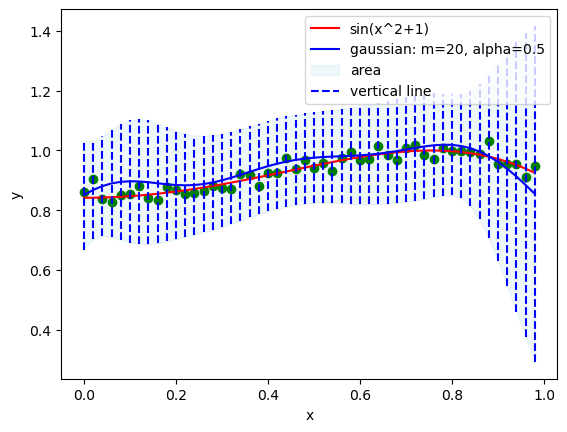

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30]
20


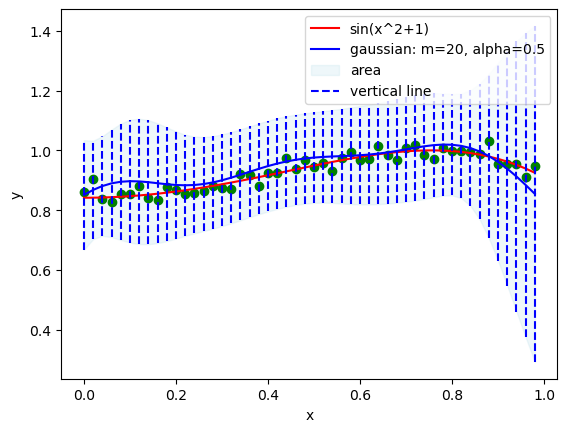

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13]
21


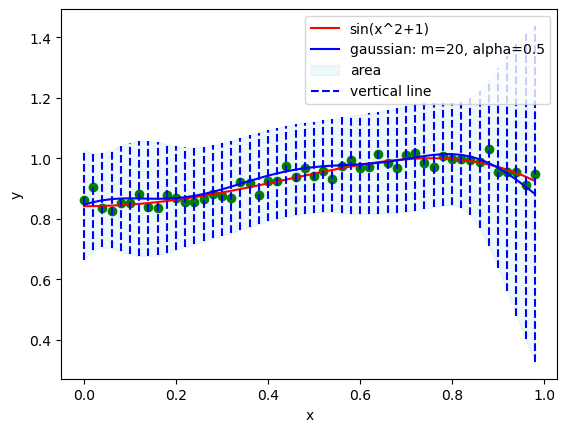

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3]
22


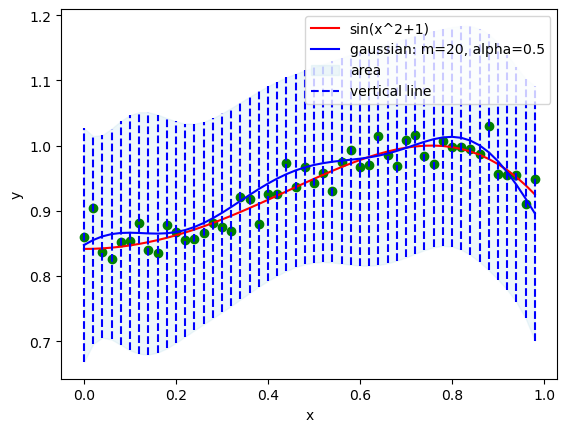

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48]
23


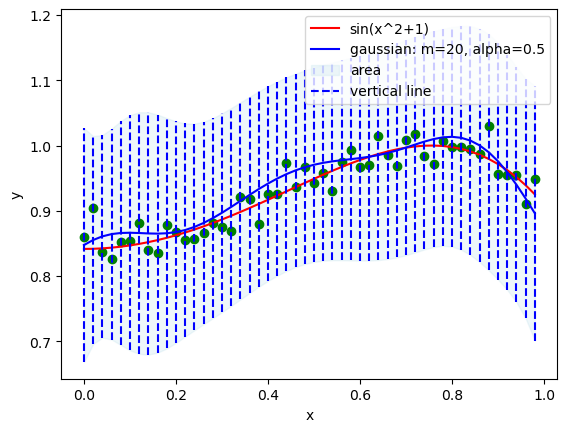

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30]
24


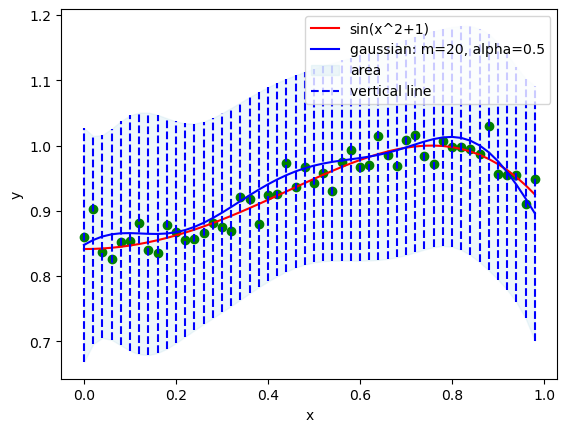

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23]
25


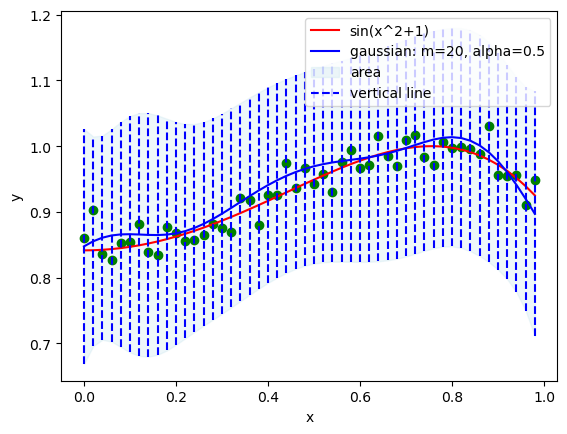

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46]
26


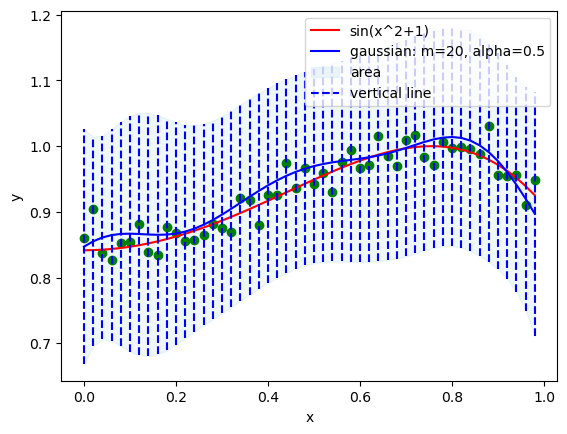

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15]
27


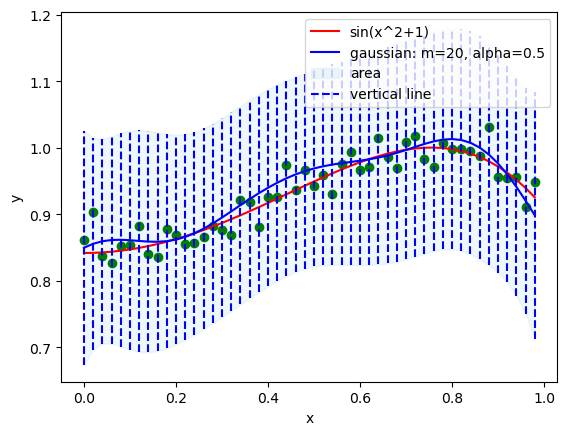

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7]
28


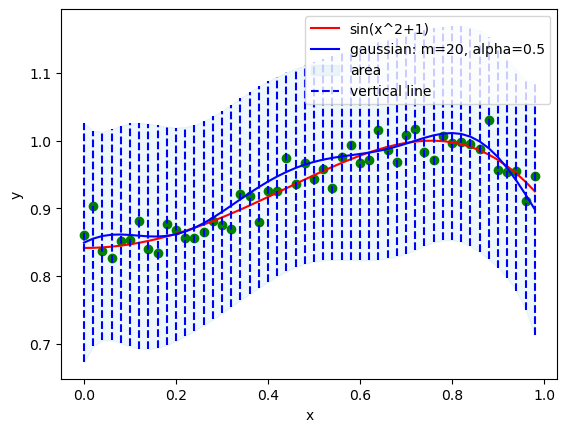

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40]
29


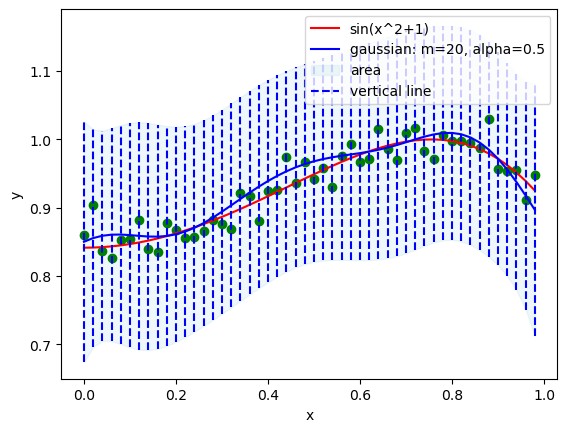

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45]
30


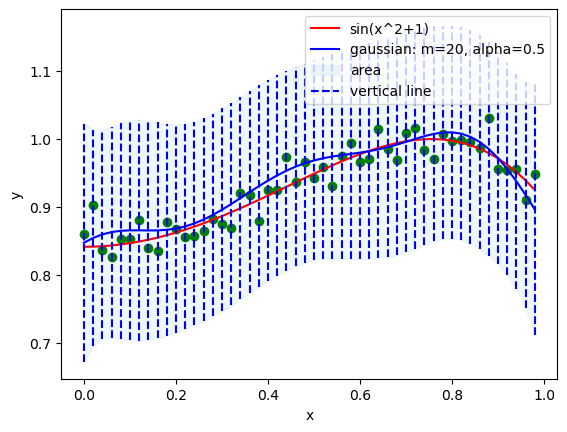

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9]
31


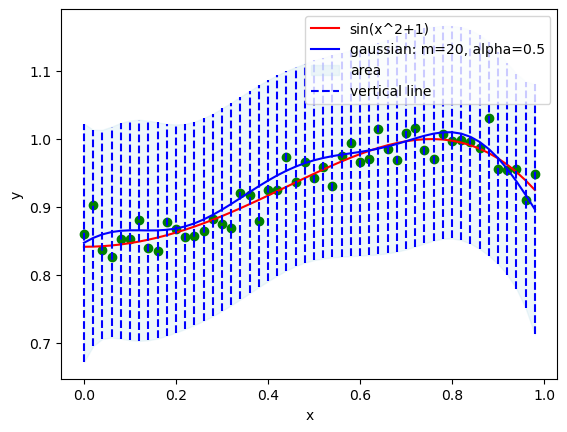

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31]
32


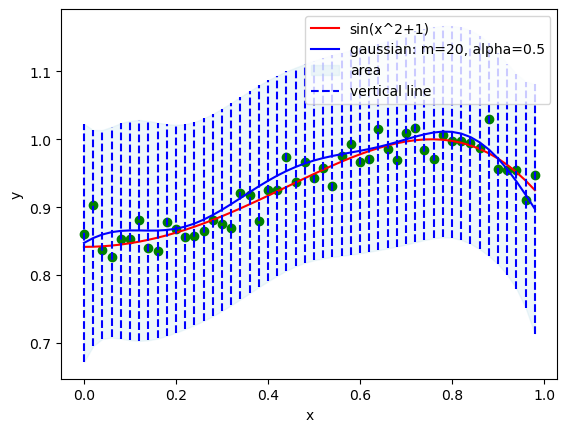

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33]
33


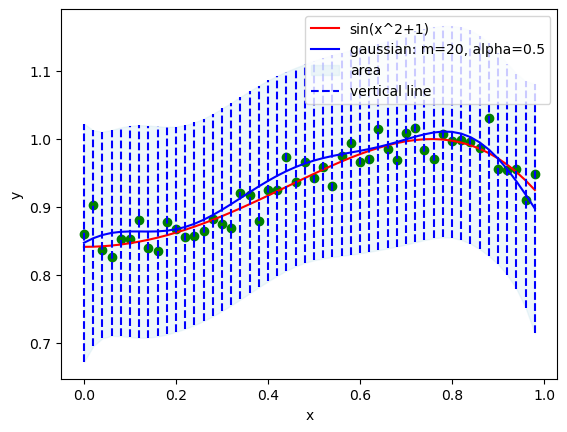

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5]
34


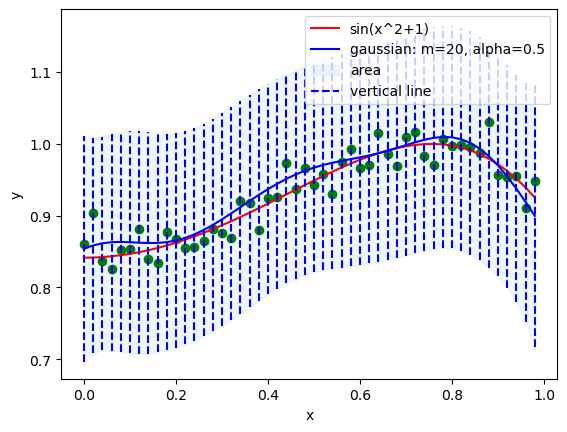

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0]
35


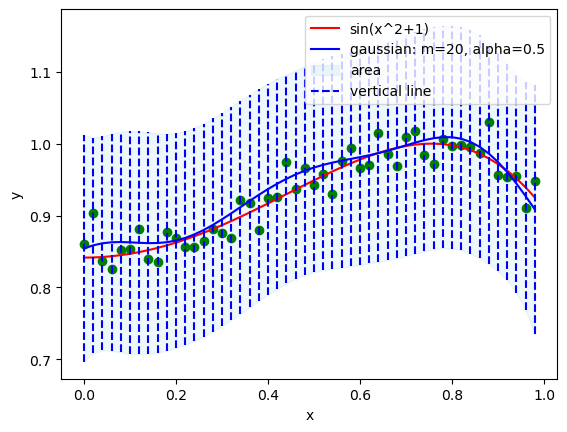

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0, 47]
36


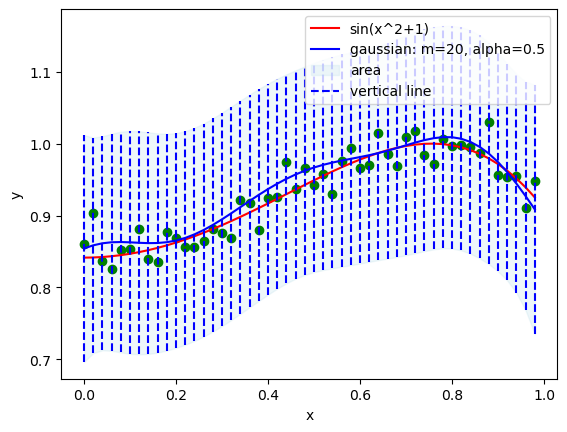

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0, 47, 31]
37


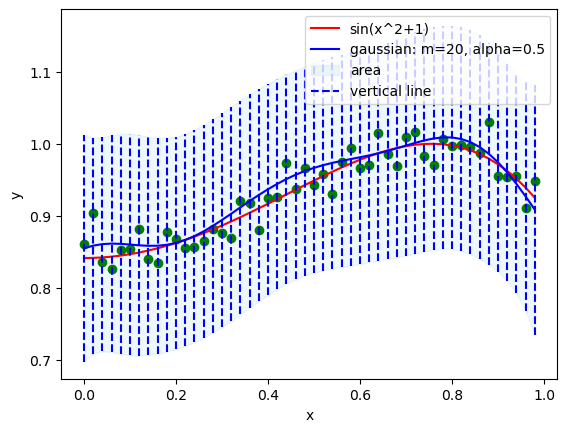

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0, 47, 31, 8]
38


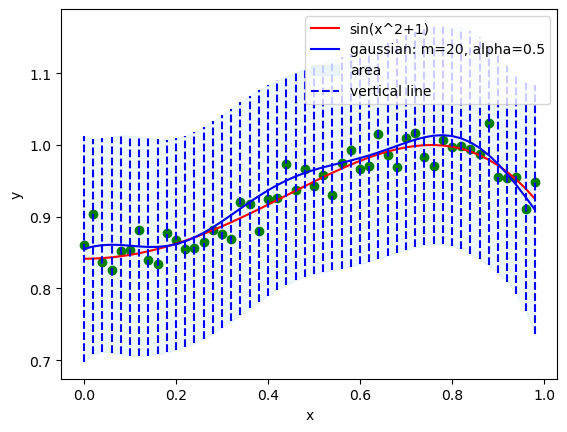

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0, 47, 31, 8, 36]
39


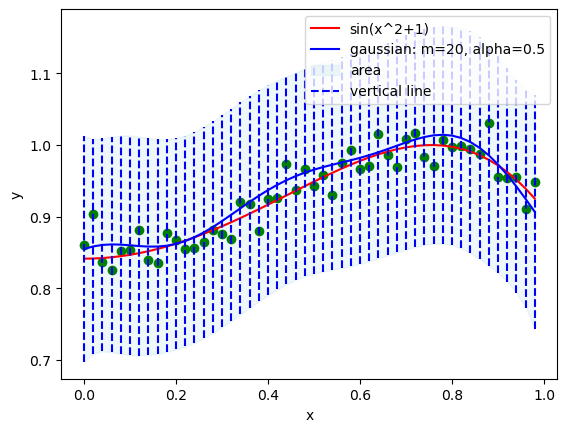

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0, 47, 31, 8, 36, 48]
40


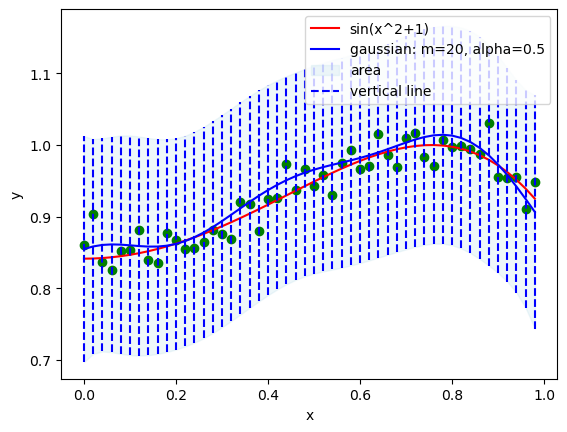

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0, 47, 31, 8, 36, 48, 31]
41


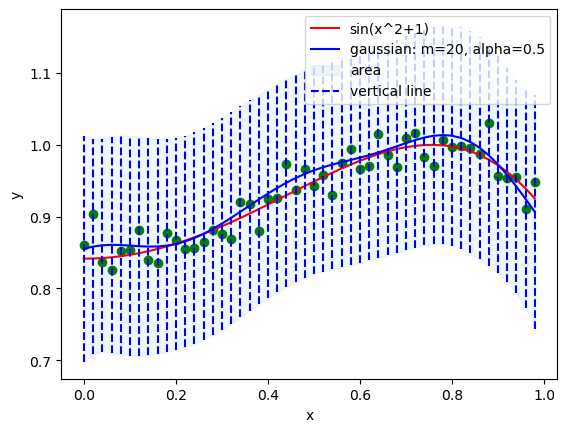

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0, 47, 31, 8, 36, 48, 31, 19]
42


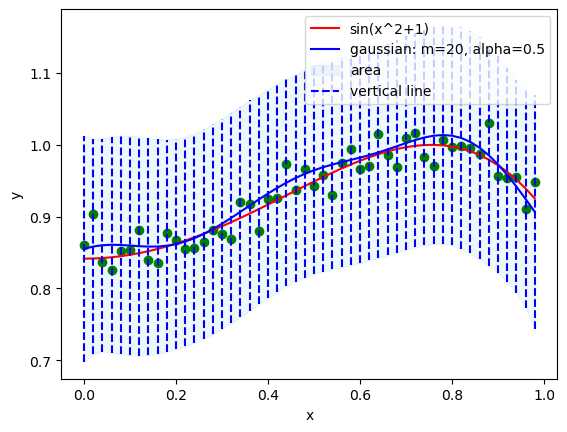

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0, 47, 31, 8, 36, 48, 31, 19, 13]
43


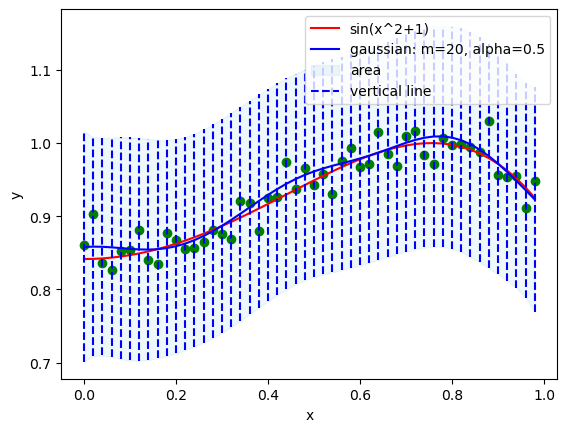

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0, 47, 31, 8, 36, 48, 31, 19, 13, 49]
44


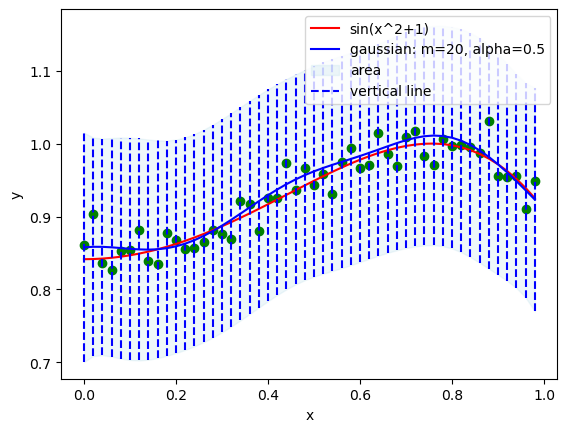

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0, 47, 31, 8, 36, 48, 31, 19, 13, 49, 32]
45


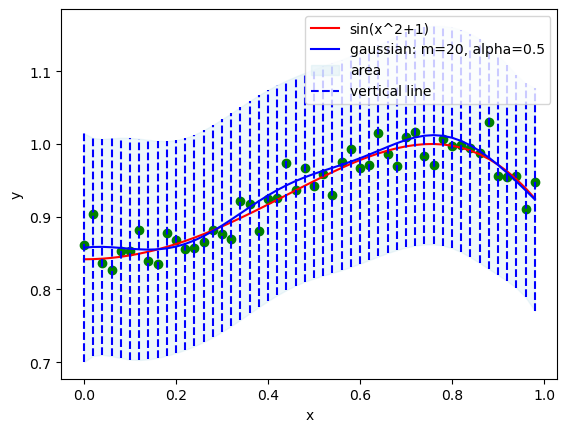

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0, 47, 31, 8, 36, 48, 31, 19, 13, 49, 32, 27]
46


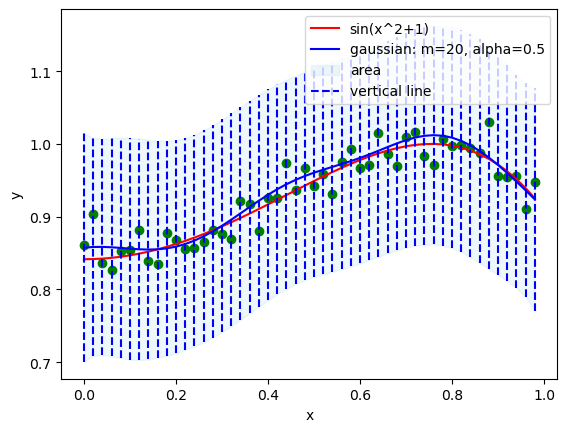

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0, 47, 31, 8, 36, 48, 31, 19, 13, 49, 32, 27, 24]
47


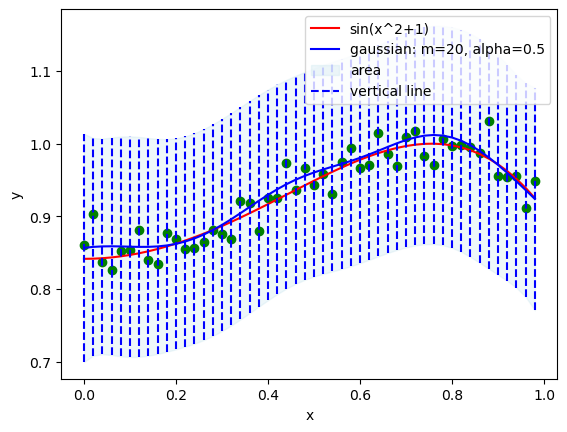

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0, 47, 31, 8, 36, 48, 31, 19, 13, 49, 32, 27, 24, 9]
48


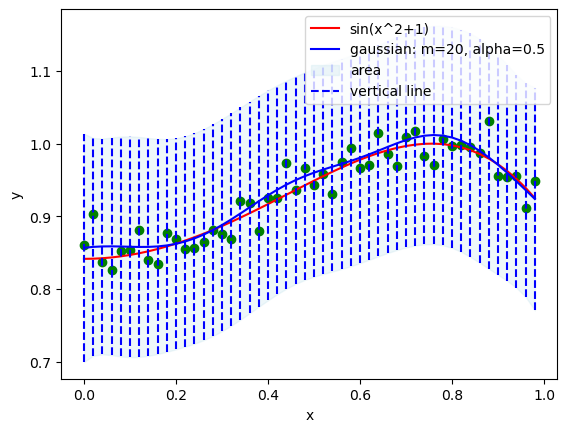

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0, 47, 31, 8, 36, 48, 31, 19, 13, 49, 32, 27, 24, 9, 21]
49


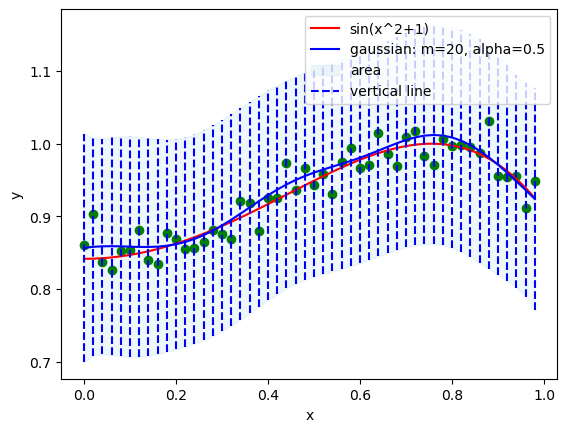

[2, 34, 23, 26, 18, 24, 22, 20, 17, 10, 25, 39, 26, 19, 1, 42, 12, 24, 18, 30, 13, 3, 48, 30, 23, 46, 15, 7, 40, 45, 9, 31, 33, 5, 0, 47, 31, 8, 36, 48, 31, 19, 13, 49, 32, 27, 24, 9, 21, 12]
50


In [27]:
def display_distribution(m, alpha, x, y_, y_origin, y_noise, area, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')

    # 固定置信区间的上下界
    lower_bound = -1
    upper_bound = 5

    # 使用plt.fill_between填充置信区间
    plt.fill_between(x, y_ + area, y_ - area, alpha=0.2, color='lightblue', label='area')
    plt.vlines(x, ymin=y_ - area, ymax=y_ + area, color='blue', linestyle='--', label='vertical line')

    # 在区间内添加竖线
    # plt.axvline(x.all(), color='blue', linestyle='--', label='竖线')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


i_arr = []

# x, y_origin, y_noise, sub_y = get_data(nodes, mu, var, 1.0, p_1)
_, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var, gaussian, 1.0)

for i in range(0, 50):
    index = random.randint(0, 49)
    i_arr.append(index)
    # x_arr.append(x[index])
    # y_noise_arr.append(y_noise[index])
    w_, _, ss = full_bayesian_mine(m, alpha, x[i_arr], y_noise[i_arr], var, gaussian, 1.0)
    y_ = X @ w_
    var_x = []
    for el in X:
        var_x.append(var + el.T @ ss @ el)

    display_distribution(m, alpha, x, y_, y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
    print(i_arr)
    print(i + 1)
